In [1]:
import pandas as pd
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import visualization as vis
import importlib

from IPython.display import display

## get files:

In [2]:
questionare_path = "../res/user_data/questionare.xlsx"
participant_order_path = "../res/participant_order.xlsx"
user_data_path = "../res/user_data/"

chat_bot_files  = [f for f in os.listdir(user_data_path) if f.endswith('.json')]

df_questionare = pd.read_excel(open(questionare_path, 'rb'), index_col=0)
df_participant_order = pd.read_excel(open(participant_order_path, 'rb'), index_col=0)


In [3]:
#df_questionare.where(df_questionare['Participant code'] == 4 & df_questionare['Completion time'] == "2023-10-28 21:02:47", inplace=True)
df_questionare = df_questionare.drop(22)
#df_questionare

## questionare data preparation:

In [4]:
question_labels = ["The chatbot’s personality was realistic and engaging",
                   "The chatbot seemed too robotic",
                   "The chatbot was welcoming during initial setup",
                   "The chatbot seemed very unfriendly",
                   "The chatbot explained its scope and purpose well",
                   "The chatbot gave no indication as to its purpose",
                   "The chatbot was easy to navigate","It would be easy to get confused when using the chatbot",
                   "The chatbot understood me well","The chatbot failed to recognise a lot of my inputs",
                   "Chatbot responses were useful, appropriate and informative","Chatbot responses were irrelevant",
                   "The chatbot coped well with any errors or mistakes",
                   "The chatbot seemed unable to handle any errors",
                   "The chatbot was very easy to use",
                   "The chatbot was very complex"
                   ]
question_labels_2 = [x + "2" for x in question_labels]
rename_dict = {v: k for k, v in zip(question_labels, question_labels_2)}



In [5]:
df = df_questionare.merge(df_participant_order, left_on="Participant code", right_on="Participant number")
df.drop(columns=["Please complete the first three trials", "Please complete the last three trials", 'Task 1', 'Task 2', 'Task 3', 'Task 4', 'Task 5', 'Task 6'], inplace=True)
df.drop(columns=["​Experiment Description\n\nThe aim of the project is to determine how the communication style of a chatbot impacts the perceived quality of it. The communication styles vary on formality of language..."], inplace=True)
display(df)

,Start time,Completion time,Email,Name,Language,Last modified time,Participant code,Age,The chatbot’s personality was realistic and engaging,The chatbot seemed too robotic,...,"Chatbot responses were useful, appropriate and informative2",Chatbot responses were irrelevant2,The chatbot coped well with any errors or mistakes2,The chatbot seemed unable to handle any errors2,The chatbot was very easy to use2,The chatbot was very complex2,Chatbot group start,done by,json?,notes
0,2023-10-24 14:32:05,2023-10-24 14:47:12,anonymous,NaN,NaN,NaN,6,23,Agree,Strongly agree,...,Agree,Disagree,Disagree,Neutral,Agree,Disagree,Informal,annebelle,yes,NaN
1,2023-10-24 16:25:52,2023-10-24 17:05:53,anonymous,NaN,NaN,NaN,25,25,Agree,Disagree,...,Agree,Disagree,Disagree,Disagree,Agree,Agree,Formal,ellora,yes,NaN
2,2023-10-24 21:38:57,2023-10-24 21:52:38,anonymous,NaN,NaN,NaN,1,24,Neutral,Agree,...,Agree,Disagree,Neutral,Neutral,Agree,Neutral,Formal,robin,yes,NaN
3,2023-10-25 17:42:31,2023-10-25 17:55:19,anonymous,NaN,NaN,NaN,2,28,Neutral,Agree,...,Agree,Strongly disagree,Disagree,Agree,Disagree,Disagree,Informal,robin,yes,NaN
4,2023-10-25 18:47:38,2023-10-25 19:02:51,anonymous,NaN,NaN,NaN,9,26,Disagree,Agree,...,Disagree,Disagree,Disagree,Agree,Agree,Disagree,Formal,annebelle,yes,NaN
5,2023-10-25 20:01:19,2023-10-25 20:19:25,anonymous,NaN,NaN,NaN,3,60,Strongly disagree,Neutral,...,Neutral,Disagree,Disagree,Neutral,Agree,Disagree,Formal,robin,yes,NaN
6,2023-10-25 22:35:34,2023-10-25 23:10:42,anonymous,NaN,NaN,NaN,7,26,Disagree,Agree,...,Neutral,Neutral,Disagree,Agree,Neutral,Disagree,Formal,annebelle,yes,NaN
7,2023-10-25 18:54:52,2023-10-25 23:33:20,anonymous,NaN,NaN,NaN,8,27,Disagree,Neutral,...,Agree,Strongly disagree,Neutral,Disagree,Agree,Agree,Informal,annebelle,yes,NaN
8,2023-10-26 00:26:19,2023-10-26 03:32:18,anonymous,NaN,NaN,NaN,24,23,Agree,Neutral,...,Agree,Agree,Neutral,Neutral,Neutral,Agree,Informal,ellora?,no,NaN
9,2023-10-26 12:51:57,2023-10-26 13:06:29,anonymous,NaN,NaN,NaN,19,23,Disagree,Agree,...,Agree,Disagree,Disagree,Disagree,Agree,Disagree,Formal,tomas,yes,NaN


In [6]:
# create df for genz
df_questionare_genz_1 = df[df["Chatbot group start"].str.match("Informal")]
df_questionare_genz_1 = df_questionare_genz_1.drop(columns=question_labels_2)
df_questionare_genz_2 = df[df["Chatbot group start"].str.match("Formal")]
df_questionare_genz_2 = df_questionare_genz_2.drop(columns=question_labels)
df_questionare_genz_2  = df_questionare_genz_2.rename(columns=rename_dict)


df_questionare_genz = pd.concat([df_questionare_genz_1, df_questionare_genz_2 ])
df_questionare_genz["language"] = "genz"
print(len(df_questionare_genz)) 


25


In [7]:
# same as above get df for formal
df_questionare_formal_1 = df[df["Chatbot group start"].str.match("Formal")]
df_questionare_formal_1 = df_questionare_formal_1.drop(columns=question_labels_2)
df_questionare_formal_2 = df[df["Chatbot group start"].str.match("Informal")]
df_questionare_formal_2 = df_questionare_formal_2.drop(columns=question_labels)
df_questionare_formal_2 = df_questionare_formal_2.rename(columns=rename_dict)

df_questionare_formal = pd.concat([df_questionare_formal_1, df_questionare_formal_2 ])
df_questionare_formal = df_questionare_formal.drop(columns=["Chatbot group start"])
df_questionare_formal["language"] = "formal"
#print((df_questionare_formal.columns)) 

In [8]:
df_questionare = pd.concat([df_questionare_genz, df_questionare_formal])
df_questionare = df_questionare.set_index(["Participant code", "language"])
df_questionare = df_questionare.drop(columns=["Chatbot group start"])


In [9]:
# 'Chatbot group start' gives the order of the user did the language options

In [10]:
def score_label(x):
    agree_scores = {
        "Strongly agree": 5,
        "Agree": 4,
        "Neutral": 3,
        "Disagree": 2,
        "Strongly disagree": 1
    }
    return agree_scores[x]

def calc_CUQ_score(df):
    # step 1:

    # step 2 and 3:
    # odd and even are swapped, cause we count from 0
    # step 2
    positiv_score = 0
    for i in range(0,len(question_labels), 2):
        
        positiv_score += df[question_labels[i]]
    # step 3:
    negative_score = 0
    for i in range(1,len(question_labels), 2):
        
        negative_score += df[question_labels[i]]
    
    #step 4:
    positiv_score = positiv_score - 8
    # step 5:
    negative_score = 40 - negative_score
    # step 6:
    cuq_score = positiv_score + negative_score 
    #You should now have a score out of 64 
    if cuq_score > 64:
        raise ValueError("CUQ score is greater than 64")
    # step 7:
    cuq_score = cuq_score / 64 
    cuq_score = cuq_score * 100
    return cuq_score

for question in question_labels:
    df_questionare[question] = df_questionare[question].apply(score_label)

for index, row in df_questionare.iterrows():
   # print( calc_CUQ_score(row))
    df_questionare.at[index, "CUQ"] = calc_CUQ_score(row)




In [11]:
print("Questionare Dataset:")
display(df_questionare)

Questionare Dataset:


,,Start time,Completion time,Email,Name,Language,Last modified time,Age,The chatbot’s personality was realistic and engaging,The chatbot seemed too robotic,The chatbot was welcoming during initial setup,...,"Chatbot responses were useful, appropriate and informative",Chatbot responses were irrelevant,The chatbot coped well with any errors or mistakes,The chatbot seemed unable to handle any errors,The chatbot was very easy to use,The chatbot was very complex,done by,json?,notes,CUQ
Participant code,language,,,,,,,,,,,,,,,,,,,,,
6,genz,2023-10-24 14:32:05,2023-10-24 14:47:12,anonymous,NaN,NaN,NaN,23,4,5,4,...,3,4,1,5,2,2,annebelle,yes,NaN,37.5000
2,genz,2023-10-25 17:42:31,2023-10-25 17:55:19,anonymous,NaN,NaN,NaN,28,3,4,3,...,4,2,1,3,3,2,robin,yes,NaN,46.8750
8,genz,2023-10-25 18:54:52,2023-10-25 23:33:20,anonymous,NaN,NaN,NaN,27,2,3,4,...,1,1,1,5,1,4,annebelle,yes,NaN,18.7500
24,genz,2023-10-26 00:26:19,2023-10-26 03:32:18,anonymous,NaN,NaN,NaN,23,4,3,4,...,4,2,4,3,4,2,ellora?,no,NaN,68.7500
20,genz,2023-10-26 14:05:23,2023-10-26 14:27:20,anonymous,NaN,NaN,NaN,24,4,3,4,...,3,4,2,2,3,3,tomas,yes,NaN,50.0000
10,genz,2023-10-27 12:53:26,2023-10-27 13:14:54,anonymous,NaN,English (United Kingdom)‎,NaN,31,4,2,4,...,4,3,4,2,2,2,annebelle,yes,NaN,67.1875
12,genz,2023-10-27 17:19:09,2023-10-27 17:33:17,anonymous,NaN,English (United Kingdom)‎,NaN,23,4,2,5,...,4,1,2,2,5,3,annebelle,yes,NaN,71.8750
14,genz,2023-10-27 17:57:33,2023-10-27 18:18:08,anonymous,NaN,English (United Kingdom)‎,NaN,26,2,2,3,...,3,3,1,4,4,2,annebelle,yes,NaN,39.0625
4,genz,2023-10-28 21:05:53,2023-10-28 21:15:20,anonymous,NaN,English (United Kingdom)‎,NaN,23,3,2,3,...,2,2,3,5,2,4,robin,yes,drop older version of 4,37.5000


In [12]:
# user id

# total time (average of tasks with same language)
# number of suggestions (average of tasks with same language)
# number of turns (average of tasks with same language)
# number_of_suggestions
# number_of_restarts
df_chat = pd.DataFrame(columns=["user_id",  "language",  "number_of_turns", "time", "number_of_suggestions", "number_of_restarts"])
for chat_data in chat_bot_files:
    chat_data = json.load(open(user_data_path + chat_data))
    row = df_chat.loc[(df_chat["user_id"] == chat_data["user_id"] ) & (df_chat["language"] == chat_data["configuration"]["language"]  ) ]
    total_time = sum([x["response_seconds"] for x in chat_data["turns"]])
    if row.empty:

        row = pd.DataFrame([[ chat_data["user_id"],  chat_data["configuration"]["language"],  len(chat_data["turns"]) , total_time, chat_data["number_suggestions"], chat_data["number_restart"] ] ], 
                           columns=["user_id",  "language", "number_of_turns", "time", "number_of_suggestions", "number_of_restarts"])

        df_chat = pd.concat([df_chat, row])
    else:
        row.loc[0,"number_of_turns"] = row.loc[0,"number_of_turns"] + len(chat_data["turns"])
        row.loc[0,"time"] = row.loc[0,"time"] + total_time
        row.loc[0,"number_of_suggestions"] = row.loc[0,"number_of_suggestions"] + chat_data["number_suggestions"]
        row.loc[0, "number_of_restarts"] = row.loc[0, "number_of_restarts"] + chat_data["number_restart"]
        df_chat.loc[(df_chat["user_id"] == chat_data["user_id"] ) & (df_chat["language"] == chat_data["configuration"]["language"]  ) ] = row

df_chat["number_of_turns"] = df_chat["number_of_turns"] / 3
df_chat["time"] = df_chat["time"] / 3
df_chat["number_of_suggestions"] = df_chat["number_of_suggestions"] / 3
df_chat["number_of_restarts"] = df_chat["number_of_restarts"] / 3



df_chat["language"] = df_chat['language'].str.lower()
#df_chat.rename(columns={"user_id": "Participant code"}, inplace=True)
df_chat.set_index(["user_id", "language"], inplace=True)
print("Chatbot Dataframe:")
display(df_chat)

Chatbot Dataframe:


,,number_of_turns,time,number_of_suggestions,number_of_restarts
user_id,language,,,,
20,formal,9.333333,97.563569,0.666667,0.0
23,formal,7.666667,75.644213,0.666667,0.333333
12,genz,11.0,100.413311,2.0,0.333333
11,formal,12.333333,93.976582,1.333333,0.333333
13,formal,9.666667,77.838563,1.0,0.0
6,genz,12.333333,83.626476,1.0,1.333333
20,genz,10.666667,92.969189,0.666667,0.666667
4,formal,4.666667,42.064284,0.666667,0.333333
8,genz,5.666667,93.257106,0.0,0.0


In [13]:
df_chat.reset_index(inplace=True)
df_questionare.reset_index(inplace=True)

In [14]:
### the index -unique identifier- of df is (participant code, language)
df_questionare["index"] = df_questionare["Participant code"].astype(str) + df_questionare["language"]
df_chat["index"] = df_chat["user_id"] + df_chat["language"]
df = df_questionare.merge(df_chat, left_on=["index"], right_on=["index"])
df = df.drop(columns=["index", "language_y", "user_id"] )# deleting other user id, so we dont need to reorder to have it at the first position..
df = df.rename(columns={"language_x": "language", "Participant code": "user_id"})
#df.reset_index (inplace=True)  # cause idk pandas i cant work with this index
#df.set_index(["Participant code", "language"], inplace=True)
print("Merged Dataframe:")
display(df)


Merged Dataframe:


,user_id,language,Start time,Completion time,Email,Name,Language,Last modified time,Age,The chatbot’s personality was realistic and engaging,...,The chatbot was very easy to use,The chatbot was very complex,done by,json?,notes,CUQ,number_of_turns,time,number_of_suggestions,number_of_restarts
0,6,genz,2023-10-24 14:32:05,2023-10-24 14:47:12,anonymous,NaN,NaN,NaN,23,4,...,2,2,annebelle,yes,NaN,37.5000,12.333333,83.626476,1.0,1.333333
1,2,genz,2023-10-25 17:42:31,2023-10-25 17:55:19,anonymous,NaN,NaN,NaN,28,3,...,3,2,robin,yes,NaN,46.8750,8.0,94.155803,0.0,0.666667
2,8,genz,2023-10-25 18:54:52,2023-10-25 23:33:20,anonymous,NaN,NaN,NaN,27,2,...,1,4,annebelle,yes,NaN,18.7500,5.666667,93.257106,0.0,0.0
3,20,genz,2023-10-26 14:05:23,2023-10-26 14:27:20,anonymous,NaN,NaN,NaN,24,4,...,3,3,tomas,yes,NaN,50.0000,10.666667,92.969189,0.666667,0.666667
4,10,genz,2023-10-27 12:53:26,2023-10-27 13:14:54,anonymous,NaN,English (United Kingdom)‎,NaN,31,4,...,2,2,annebelle,yes,NaN,67.1875,11.333333,99.417582,1.333333,0.666667
5,12,genz,2023-10-27 17:19:09,2023-10-27 17:33:17,anonymous,NaN,English (United Kingdom)‎,NaN,23,4,...,5,3,annebelle,yes,NaN,71.8750,11.0,100.413311,2.0,0.333333
6,14,genz,2023-10-27 17:57:33,2023-10-27 18:18:08,anonymous,NaN,English (United Kingdom)‎,NaN,26,2,...,4,2,annebelle,yes,NaN,39.0625,10.0,145.119985,1.333333,0.333333
7,4,genz,2023-10-28 21:05:53,2023-10-28 21:15:20,anonymous,NaN,English (United Kingdom)‎,NaN,23,3,...,2,4,robin,yes,drop older version of 4,37.5000,15.666667,139.118606,0.333333,0.666667
8,26,genz,2023-10-30 10:27:11,2023-10-30 11:21:13,anonymous,NaN,English (United Kingdom)‎,NaN,59,3,...,3,2,ellora,yes,NaN,40.6250,18.666667,203.910068,1.666667,1.333333
9,16,genz,2023-11-02 21:37:56,2023-11-02 23:04:42,anonymous,NaN,English (United Kingdom)‎,NaN,22,3,...,3,3,Matthijs,yes,NaN,51.5625,20.333333,342.509516,1.666667,0.666667


Text(0, 0.5, 'user satisfaction (cuq)')

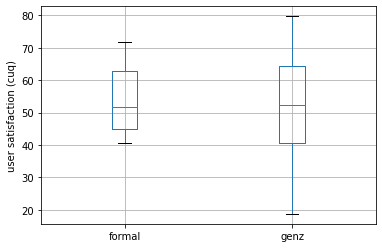

In [15]:


cuq_formal = df[df["language"].str.match("formal")]["CUQ"]

cuq_genz = df[df["language"].str.match("genz")]["CUQ"]
cuq_plot = pd.DataFrame({'formal':cuq_formal,
                   'genz':cuq_genz})
#df_plot = df[df["language"].str.match("formal")][]

#print (cuq_formal.columns)
#df_plot = df_plot.set_index(["user_id", "language"])

bplot = cuq_plot.boxplot()
bplot.set_ylabel('user satisfaction (cuq)')
#cuq_genz.plot()
#df.plot()

some statiscitcs:

In [41]:
import scipy
def print_statistic_values(df, key):
    df_genz =  df[df["language"].str.match("genz")][key].values.astype("float")
    df_formal =  df[df["language"].str.match("formal")][key].values.astype("float")
    total = df[key].values.astype("float")
    print("key:", key)
    print("mean of genz and formal and total:", np.mean(df_genz), np.mean(df_formal), np.mean(total))
    print("median of genz and formal and total:", np.median(df_genz), np.median(df_formal), np.median(total))
    print("standard deviation of genz and formal and total:", np.std(df_genz), np.std(df_formal), np.std(total))     
    print("genz and formal are normal distributed:", scipy.stats.normaltest(df_genz),scipy.stats.normaltest( df_formal))
    print("ttest:" , stats.ttest_ind(a = df_genz, b= df_formal))
    print("wilcoxon:" , stats.wilcoxon(x = df_genz, y= df_formal, method="exact"))     


In [42]:
print_statistic_values(df, "CUQ")
print_statistic_values(df, "The chatbot’s personality was realistic and engaging")
print_statistic_values(df, "number_of_turns")
print_statistic_values(df, "time")


key: CUQ
mean of genz and formal and total: 52.669270833333336 53.190104166666664 52.9296875
median of genz and formal and total: 52.34375 51.5625 51.5625
standard deviation of genz and formal and total: 14.500409467623067 9.845807972155763 12.396318869605086
genz and formal are normal distributed: NormaltestResult(statistic=0.3526842716261074, pvalue=0.8383311111689231) NormaltestResult(statistic=3.9867627770752625, pvalue=0.136233985693986)
ttest: TtestResult(statistic=-0.14251179316941265, pvalue=0.8872981580462933, df=46.0)
wilcoxon: WilcoxonResult(statistic=143.0, pvalue=0.8553357124328613)
key: The chatbot’s personality was realistic and engaging
mean of genz and formal and total: 3.625 2.5416666666666665 3.0833333333333335
median of genz and formal and total: 4.0 2.0 3.0
standard deviation of genz and formal and total: 0.9492321458245431 0.9565200236040831 1.0960788698304922
genz and formal are normal distributed: NormaltestResult(statistic=1.3092604821892904, pvalue=0.519634166

Time Stats

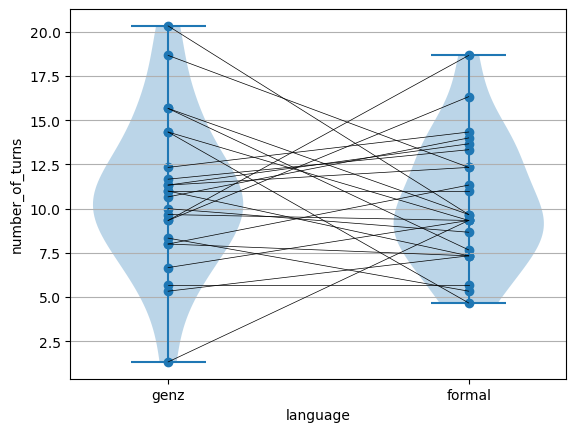

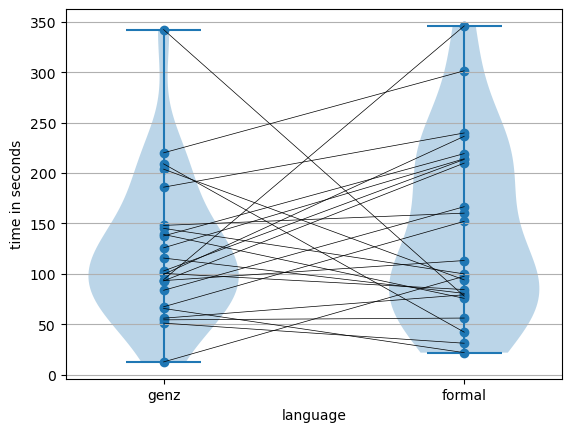

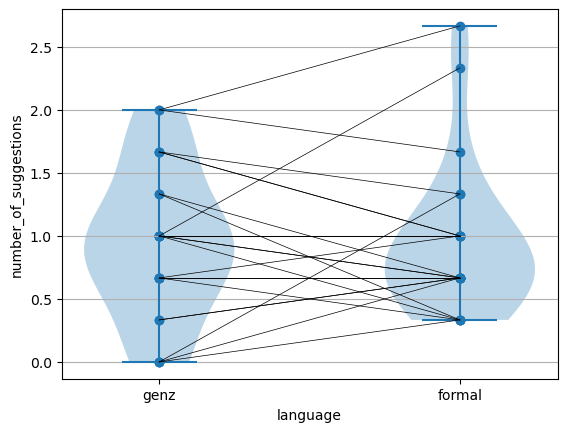

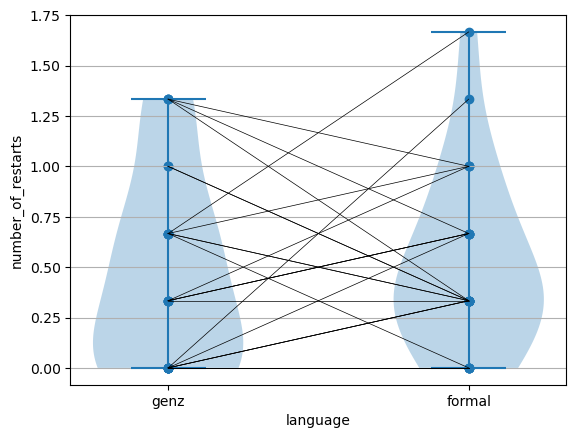

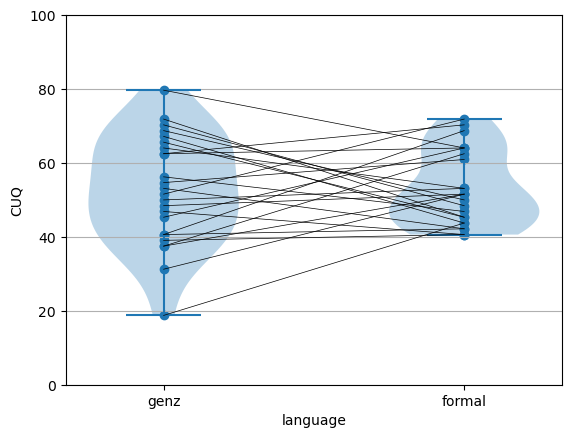

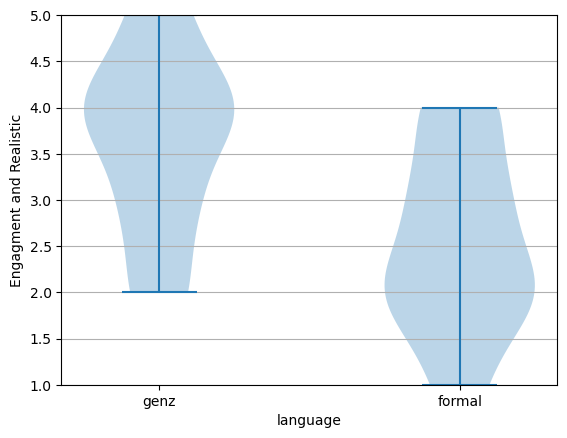

In [48]:
importlib.reload(vis)



fig, axes = vis.violin_with_dots(df,x="language", y="number_of_turns") #, title="Time", ylabel="Time (s)", xlabel="Language"
fig, axes = vis.violin_with_dots(df,x="language", y="time", y_label="time in seconds") #, title="Time", ylabel="Time (s)", xlabel="Language"
fig, axes = vis.violin_with_dots(df,x="language", y="number_of_suggestions") #, title="Time", ylabel="Time (s)", xlabel="Language"
fig, axes = vis.violin_with_dots(df,x="language", y="number_of_restarts") #, title="Time", ylabel="Time (s)", xlabel="Language"


fig, axes = vis.violin_with_dots(df,x="language", y="CUQ", y_range=[0,100]) #, title="Time", ylabel="Time (s)", xlabel="Language"

fig, axes = vis.violin_with_dots(df,x="language", y="The chatbot’s personality was realistic and engaging",y_range=[1,5], y_label="Engagment and Realistic", plot_lines=False, plot_dots=False) #, title="Time", ylabel="Time (s)", xlabel="Language"


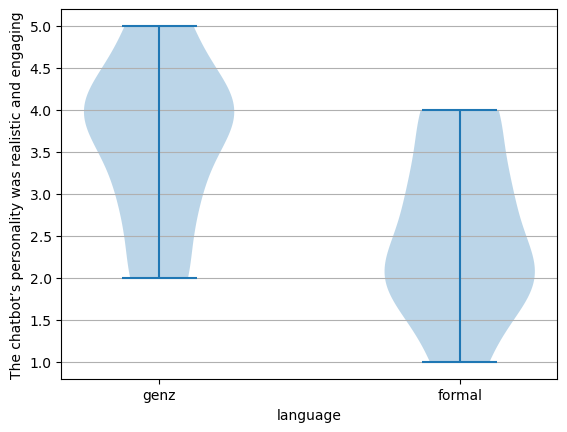

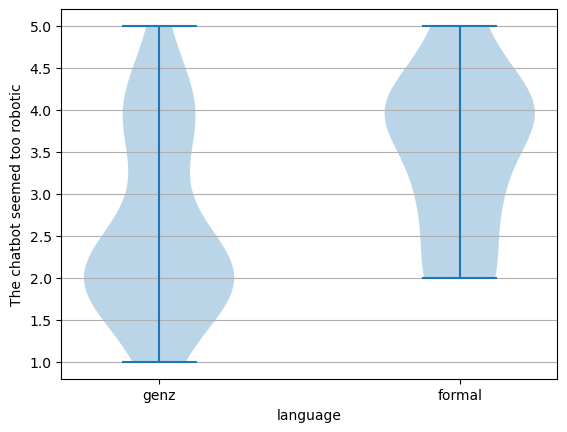

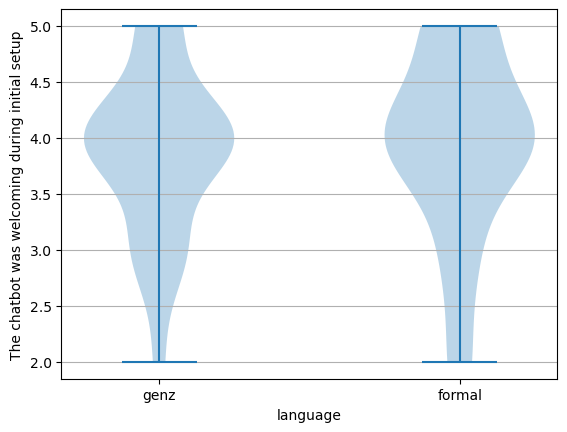

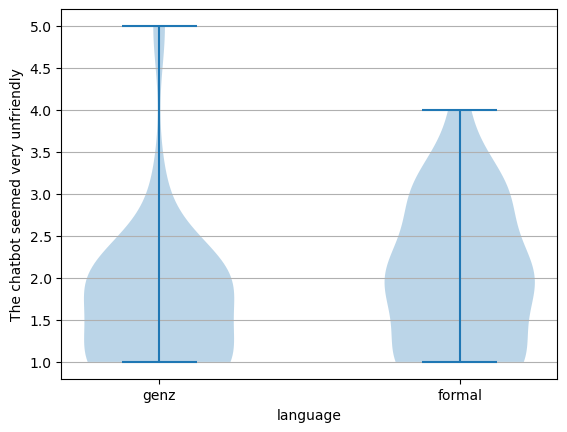

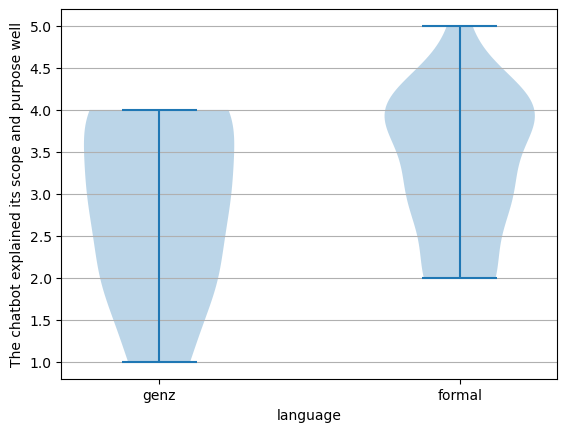

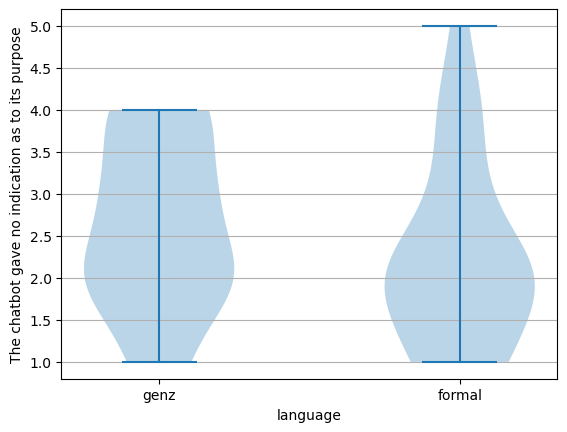

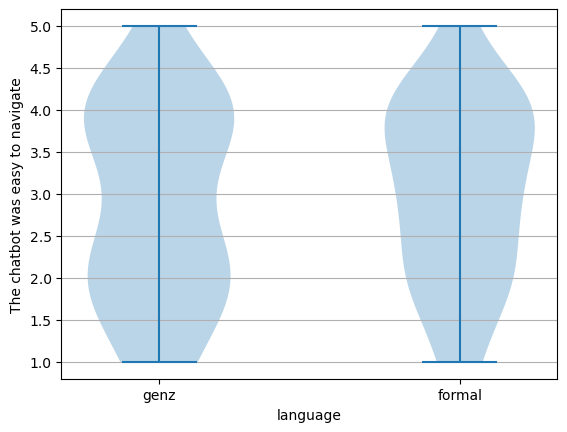

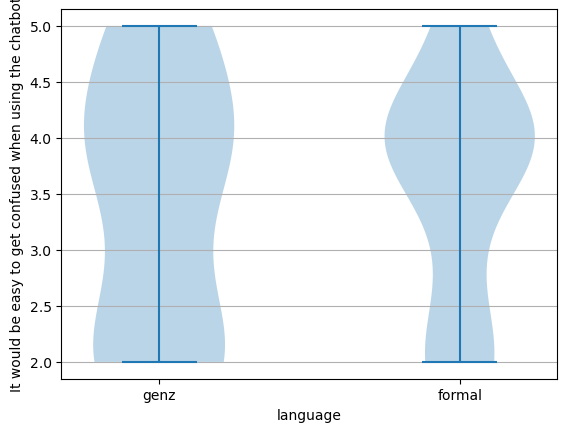

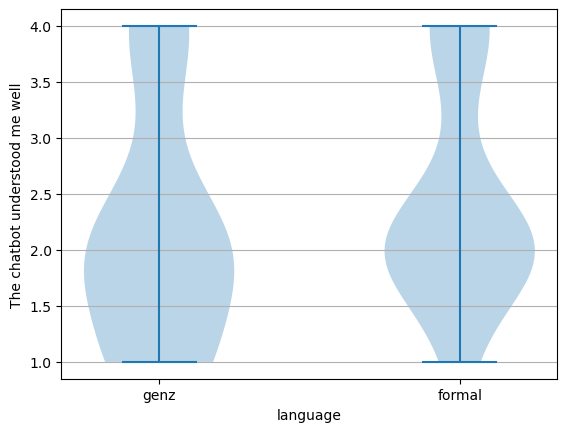

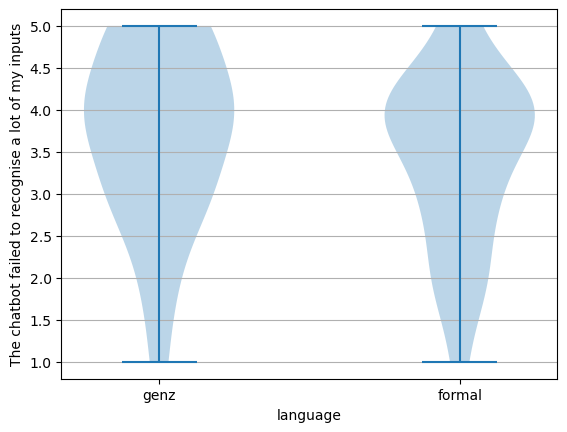

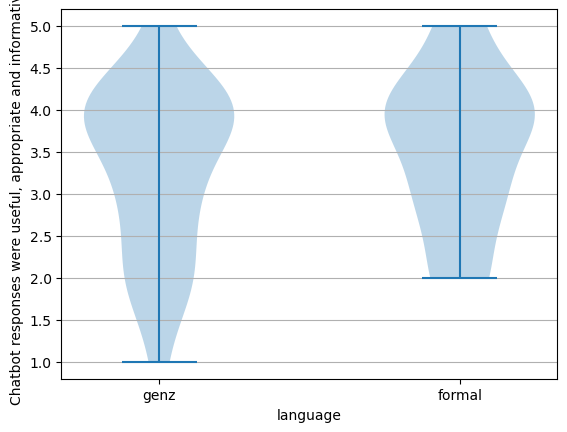

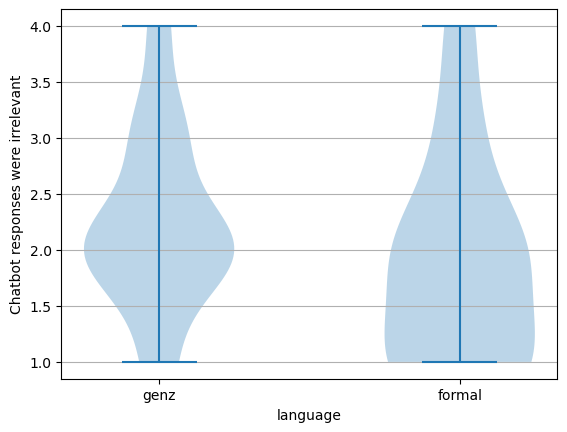

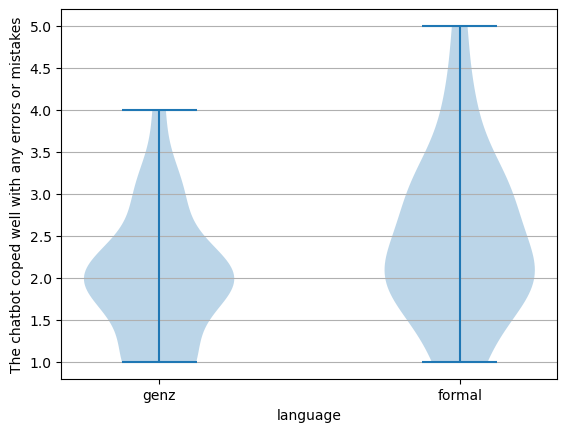

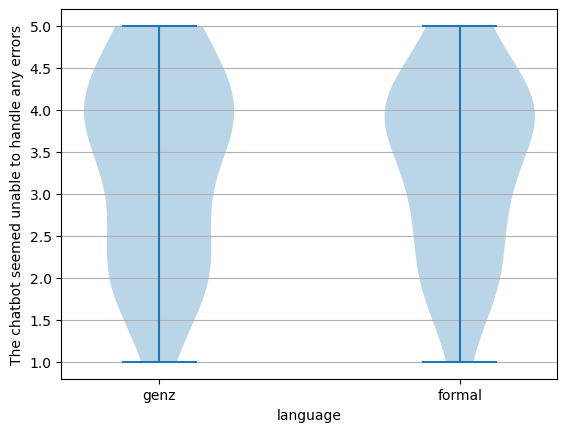

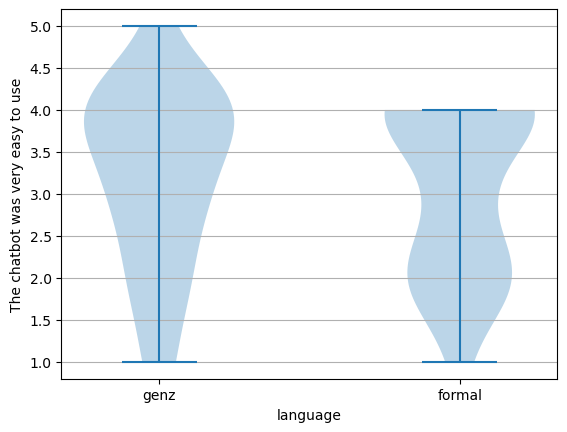

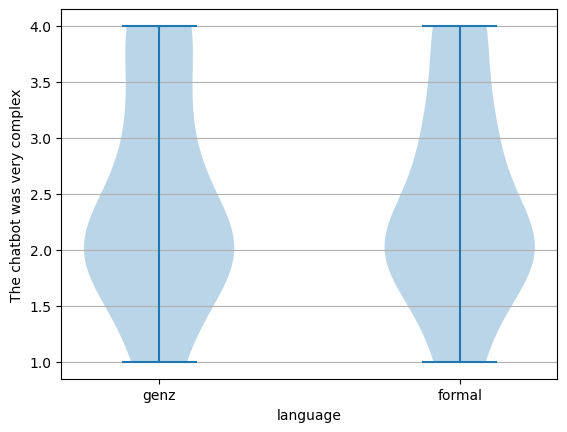

In [19]:


for label in question_labels:
       #display(df["labelscore"])
    fig, axes = vis.violin_with_dots(df,x="language", y=label, plot_lines=False, plot_dots=False) 
